In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

In [5]:
def my_PCA(X, k):
    """
    X: dataframe
        dataframe with n observation and p features (nxp)
    k: int
        number of principal components we want to project on
    output: array-shape
        return the projected data (nxk), where k is the number of principal components we have projected on
    """

    # center the data
    X_std = X - X.mean(axis=0)

    # compute the covariance matrix
    cov_mat = np.dot(X_std.T, X_std)

    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    sorted_eigvecs = eig_vecs[:,sorted_indices]
    
    top_k_eigvecs = sorted_eigvecs[:,:k]

    projection_matrix = top_k_eigvecs

    return np.dot(X, projection_matrix)

# EX 1

In [3]:
X = np.genfromtxt("../Datasets/data_kPCA_2022-2023.txt")
y = np.genfromtxt("../Datasets/labels_kPCA_2022-2023.txt")

In [11]:
X_projected = my_PCA(X,2)
X_projected_ = PCA(2).fit_transform(X)

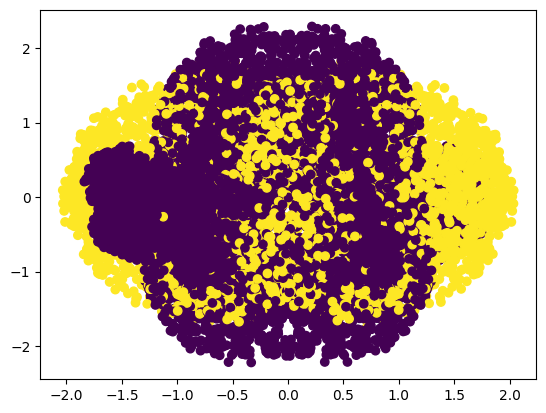

In [13]:
plt.scatter(X_projected[:,0], X_projected[:,1], c = y)
plt.scatter(X_projected_[:,0], X_projected_[:,1], c = y)
plt.show()